<font size=10> CHEME 5760 Final Project </font><br>
<font size=4> December 16th 2023 <br> Alexandra Buren and Lauren de Silva</font>

# Introduction to Our Project
In recent years, the undeniable impact of climate change has become increasingly apparent and will undoubtedly continue to shape our generation. While we acknowledge and applaud the significant contributions of the current and preceding generations to the advancement of our society,<br>
it's crucial to recognize that their technological endeavors were not always designed with environmental conservation in mind. Now, with the weight of the world on our hands we feel a sense of resposibility to right the wrongs of the past. The chemical engineers of yesteryear have<br>
had their hands in some seriously Earth-offending cookie jars. In our time here, we are determined to chart a different course, one that prioritizes sustainability and environmental well-being! With that being said, we are on a mission to use our wisdom gleaned from CHEME 5760 to pursue <br>
a career in nonother than consulting of course.<br> 

Our first client is Lauren's father, Luis. Luis has been solemnly contemplating the imminent milestone of his favorite daughter preparing to don the cap and gown, ready to face the world as a freshly-minted graduate. However, it's not her graduation that brings tears to his eyes, it's <br>
rather the anticipation of his post-child-graduation-wealth. While this is a prime time for him to channel resources into retirement savings, he insists on redirecting his money towards home upgrades, specifically investing in those solar PV panels or solar heating that Lauren suggested he get.<br>
Being an engineer himself, he not only comprehends the intricacies of these technologies but also finds them utterly fascinating. But what adds an extra layer of fascination? The potential tax breaks he can scrape up from the Maryland State government! Wisely, he understands the importance of seeking <br>
counsel before embarking on this green adventure but he will not just take any advice from daughter. Luis demands quantative analysis to solidify his decision. 


### Guidelines We Promise 
- Target 1: The juptyer notebook uploaded to the CHEME5760_finalproject Github repository is accessible to Professor Varner and anyone else interested and is able to reproduce the correct results on their computing platform
- Target 2: We sucessfully reach the target of utilizing two tools from learned throughout the course to generate a sound proposal 
- Target 3: Not only do we provide code for each target, but each block of code is accompanied with a interpertation of the data so it can be understood by our clients
 


## Setup

In [1]:
using Pkg
Pkg.add(path="https://github.com/varnerlab/VLDecisionsPackage.jl.git")
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("ForwardDiff")
Pkg.add("Distributions")
Pkg.add("PrettyTables")
Pkg.add("Plots")
Pkg.add("Colors")
Pkg.add("JLD2")
Pkg.add("FileIO")
Pkg.add("Statistics")
Pkg.add("LinearAlgebra")
Pkg.add("MathOptInterface")
Pkg.add("DataStructures")
Pkg.add("Flux")

using VLDecisionsPackage 
using VLDecisionsPackage
using CSV
using DataFrames
using ForwardDiff
using PrettyTables
using Plots
using Colors
using Distributions
using JLD2
using FileIO
using Statistics
using LinearAlgebra
using MathOptInterface
using DataStructures
using Flux


    Updating git-repo `https://github.com/varnerlab/VLDecisionsPackage.jl.git`
   Resolving package versions...
  No Changes to `C:\Users\lwdes\CHEME 5760\CHEME5760_finalProject\Project.toml`
  No Changes to `C:\Users\lwdes\CHEME 5760\CHEME5760_finalProject\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\lwdes\CHEME 5760\CHEME5760_finalProject\Project.toml`
  No Changes to `C:\Users\lwdes\CHEME 5760\CHEME5760_finalProject\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\lwdes\CHEME 5760\CHEME5760_finalProject\Project.toml`
  No Changes to `C:\Users\lwdes\CHEME 5760\CHEME5760_finalProject\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\lwdes\CHEME 5760\CHEME5760_finalProject\Project.toml`
  No Changes to `C:\Users\lwdes\CHEME 5760\CHEME5760_finalProject\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\lwdes\CHEME 5760\CHEME5760_finalProject\Project.toml`
  No Changes to `C:\Users\lwdes\

In [2]:
include("Include.jl");

  Activating project at `C:\Users\lwdes\CHEME 5760\CHEME5760_finalProject`
    Updating registry at `C:\Users\lwdes\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
    Updating git-repo `https://github.com/varnerlab/VLDecisionsPackage.jl.git`
  No Changes to `C:\Users\lwdes\CHEME 5760\CHEME5760_finalProject\Project.toml`
  No Changes to `C:\Users\lwdes\CHEME 5760\CHEME5760_finalProject\Manifest.toml`


LoadError: LoadError: UndefVarError: `_PATH_TO_SRC` not defined
in expression starting at C:\Users\lwdes\CHEME 5760\CHEME5760_finalProject\Include.jl:33

In [3]:
function UCD(x)
    
    # load data -
    dataset = SolarPVSet();
    α = dataset[:,:"Exponent "];
    
    number_of_features = length(x);
    solution = 1.0;

    # build the solution -
    for i ∈ 1:number_of_features
        solution *= x[i]^α[i];
    end

    # return - 
    return solution;
end

UCD (generic function with 1 method)

In [4]:
function MUCD(model::VLCobbDouglasUtilityFunction, features::Array{Float64,1})::Array{Float64,1}
    
    # initialize -
    number_of_features = length(features);
    values = zeros(number_of_features);
    α = model.α;
    
    for i ∈ 1:number_of_features
        tmp = prod(features[1:end .!=i].^(α[1:end .!=i]));
        values[i] = tmp*(α[i]*features[i]^(α[i]-1))
    end
    
    # return -
    return values
end

MUCD (generic function with 1 method)

## Data

In [5]:
current_directory=pwd();
filename="PVvsSolarHeating.csv";
full_path=joinpath(current_directory,filename);

In [6]:
using DataFrames
using CSV
function _load(path::String)::DataFrame
    return CSV.read(path, DataFrame);
end

# short circuit the loading of the data -
SolarPVSet() = _load(full_path);

In [7]:
dataset=SolarPVSet()

Row,Row,Feature,Exponent,Solar voltaic,Solar Hot Water Heating
,Int64,String,Float64,Float64,Float64
1,1,Asthetic,0.1,8.0,4.0
2,2,CO2 emission reduction/Sustainability Factor,0.3,5.0,7.0
3,3,Accessibility,0.025,8.0,5.0
4,4,Reliability,0.25,3.0,4.0
5,5,Initial Capital Investment,0.05,6.0,7.0
6,6,Incentives,0.25,8.0,4.0
7,7,Emissions from materials,0.025,6.0,6.0


In [8]:
@assert(sum(dataset[:,:"Exponent "]) == 1.0)

In [9]:
# Example evaluate function (replace with actual implementation)
(model::VLCobbDouglasUtilityFunction)(x::Vector{Float64}) = evaluate(model, x);

In [10]:
model = build(VLCobbDouglasUtilityFunction, (
        α = dataset[:,:"Exponent "],)
);

In [11]:
utility_solarVoltaic = model(dataset[:,:"Solar voltaic "]);
utility_solarWaterHeating = model(dataset[:,:"Solar Hot Water Heating "]);
println("The utility of Solar Voltaics = $(utility_solarVoltaic) while the utility of the Solar heating = $(utility_solarWaterHeating)")

The utility of Solar Voltaics = 5.320977271956105 while the utility of the Solar heating = 4.942518916566352


### Perception model
Let's suppose we can perceive differences in utility of 1% or greater

In [12]:
Δ = ((max(utility_solarVoltaic,utility_solarWaterHeating) - min(utility_solarVoltaic,utility_solarWaterHeating))/min(utility_solarVoltaic,utility_solarWaterHeating))*100

7.657195890970379

In [13]:
using ForwardDiff
Ū_solarVoltaic = ForwardDiff.gradient(UCD, dataset[:,:"Solar voltaic "]);
Ū_solarWaterHeating = ForwardDiff.gradient(UCD, dataset[:,:"Solar Hot Water Heating "]);
mu_table_df = DataFrame();
for i ∈ eachindex(Ū_solarVoltaic)
    
    row_tuple = (
        feature = dataset[i,:"Feature "],
        S_solarVoltaic = dataset[i,:"Solar voltaic "],
        MU_solarVoltaic = Ū_solarVoltaic[i],
        S_solarWaterHeating = dataset[i,:"Solar Hot Water Heating "],
        MU_solarWaterHeating = Ū_solarWaterHeating[i]
    );

    push!(mu_table_df, row_tuple);
end
mu_table_df


Row,feature,S_solarVoltaic,MU_solarVoltaic,S_solarWaterHeating,MU_solarWaterHeating
,String,Float64,Float64,Float64,Float64
1,Asthetic,8.0,0.0665122,4.0,0.123563
2,CO2 emission reduction/Sustainability Factor,5.0,0.319259,7.0,0.211822
3,Accessibility,8.0,0.0166281,5.0,0.0247126
4,Reliability,3.0,0.443415,4.0,0.308907
5,Initial Capital Investment,6.0,0.0443415,7.0,0.0353037
6,Incentives,8.0,0.166281,4.0,0.308907
7,Emissions from materials,6.0,0.0221707,6.0,0.0205938


### Check: How good is the numerical estimate of the marginal utlity?

In [14]:
analytical_MU = MUCD(model,dataset[:,"Solar voltaic "]);
numerical_versus_analytical_df = DataFrame();
for i ∈ eachindex(Ū_solarVoltaic)
    
    row_tuple = (
        feature = dataset[i,:"Feature "],
        S_solarVoltaic = dataset[i,:"Solar voltaic "],
        MU_N_solarVoltaic = Ū_solarVoltaic[i],
        MU_A_solarVoltaic = analytical_MU[i],
    );

    push!(numerical_versus_analytical_df, row_tuple);
end
numerical_versus_analytical_df

Row,feature,S_solarVoltaic,MU_N_solarVoltaic,MU_A_solarVoltaic
,String,Float64,Float64,Float64
1,Asthetic,8.0,0.0665122,0.0665122
2,CO2 emission reduction/Sustainability Factor,5.0,0.319259,0.319259
3,Accessibility,8.0,0.0166281,0.0166281
4,Reliability,3.0,0.443415,0.443415
5,Initial Capital Investment,6.0,0.0443415,0.0443415
6,Incentives,8.0,0.166281,0.166281
7,Emissions from materials,6.0,0.0221707,0.0221707


In [15]:
dx = zeros(length(Ū_solarVoltaic));
dx[4] = 1.0;
U = utility_solarVoltaic + sum(Ū_solarVoltaic.*dx)

5.764392044619114

## Marginal rate of substitution (MRS)


#### What am I willing to give up for a unit of affordability?

In [16]:
dx₂ = 1 ; # change affordability by 1-unit (willing to pay more)
feature_range = [1,3,4,5,6,7]; # we've excluded feature 2
MRS_tradeoff_table = DataFrame();
for i ∈ feature_range
    dx = -(Ū_solarVoltaic[2]/Ū_solarVoltaic[i])*dx₂
    
    results_row = (
        feature = dataset[i,:"Feature "],
        affordability = dx₂,
        MRS_solarVoltaic = dx
    );
    
    # store -
    push!(MRS_tradeoff_table, results_row);
end

MRS_tradeoff_table

Row,feature,affordability,MRS_solarVoltaic
,String,Int64,Float64
1,Asthetic,1,-4.8
2,Accessibility,1,-19.2
3,Reliability,1,-0.72
4,Initial Capital Investment,1,-7.2
5,Incentives,1,-1.92
6,Emissions from materials,1,-14.4


## Declaration of generative AI and AI-assisted technologies in the generation of this project
During the preparation of this work, both authors, Lauren de Silva and Alexandra Bruen, used ChatGPT for debugging and Julia syntax purposes. ChatGPT was also used for the polishing of some language. All 
material was thoroughly reviewed by the authors. The authors take full responsibility for their work.

# Now Testing For Insurance

In [17]:

#consdering $1952 

In [18]:
α = 0.01; # the ratio of the premium paid to the insurance company
β = 0.90; # level of damage that could occur as a fraction of the value of the object 
W = 50972.00; # the cost of the solar PV wihtout incentive. With incentive is $34
d = β*W 
r = α*d;
number_of_trials = 50000;
number_of_points = 100;

In [19]:
p₁ = 0.05; # probability that of entering the damage state (From NREL Citation (1))
d₁ = Bernoulli(p₁);

We use a `for` loop to take `number_of_trials` samples from the `Bernoulli` distribution, and save the results in the `expected_value_simulation_archive` variable, which is a `number_of_trials` $\times$ `2` array. During each trial, we:
- Generate a sample from the `Bernoulli` distribution and store it in the `future_state` variable.
- If `future_state` is equal to 1, indicating an accident state, we calculate the values for `Scenario A (no insurance)` (column 1) and `Scenario B (insurance)` (column 2) for the accident state.
- If `future_state` is equal to 0, indicating a normal state, we calculate the values for `Scenario A (no insurance)` (column 1) and `Scenario B (insurance)` (column 2) for the normal state.

In [20]:
expected_value_simulation_archive = Array{Float64,2}(undef, number_of_trials, 2);
for i ∈ 1:number_of_trials
    
    # role a random future state -
    future_state = rand(d₁);
    if (future_state == 1)
        expected_value_simulation_archive[i,1] = W - d
        expected_value_simulation_archive[i,2] = W - r
    else
        expected_value_simulation_archive[i,1] = W
        expected_value_simulation_archive[i,2] = W - r
    end
end

#### Decision: Numerical expected value
Finally, we compute the expected value for each the scenarios using the `mean(...)` function from the [Statistics.jl](https://docs.julialang.org/en/v1/stdlib/Statistics/) package:

In [21]:
μ₁ = mean(expected_value_simulation_archive,dims=1) |> vec;
if (μ₁[1] ≥ μ₁[2])
    println("𝔼(A) = $(μ₁[1]) ≥ 𝔼(B) = $(μ₁[2]) => Don't purchase insurance")
else
    println("𝔼(A) = $(μ₁[1]) < 𝔼(B) = $(μ₁[2]) => Purchase insurance")
end

𝔼(A) = 48771.84459200001 < 𝔼(B) = 50513.25199999997 => Purchase insurance


##### Check: Analytical expected value
We check the sampling algorithm above by computing the analytical value of the expectation for each scenario. The expected value for `Scenario A (no insurance)` is given by:

$$
\begin{equation}
\mathbb{E}(A) = p\cdot\left(W-d\right)+(1-p)\cdot{W}
\end{equation}
$$

while the expected value for `Scenario B (insurance)` is given by $\mathbb{E}(B) = W - r$.

In [22]:
expected_value_case_A = p₁*(W - d)+(1-p₁)*W;
expected_value_case_B = (W - r)
if (expected_value_case_A ≥ expected_value_case_B)
    println("𝔼(A) = $(expected_value_case_A) ≥ 𝔼(B) = $(expected_value_case_B) => Don't purchase insurance")
else
    println("𝔼(A) = $(expected_value_case_A) < 𝔼(B) = $(expected_value_case_A) => Purchase insurance")
end

𝔼(A) = 48678.259999999995 < 𝔼(B) = 48678.259999999995 => Purchase insurance


### Expected Utility Simulation
To compute the expected utility of each scenario, we use the instance of the `Bernoulli` distribution exported from the [Distributions.jl](https://github.com/JuliaStats/Distributions.jl) package that we constructed above, a similar sampling algorithm and a utility function. Let's begin by defining a utility function $U(x,s)$ and the inverse of the utility function $IU(x,s)$. Finally, we specify a value for the risk-aversion parameter $\tau$:

In [23]:
U

5.764392044619114

In [24]:
τ = 0.80
U1(x,s) = x^(s)
IU(x,s) = x^(1/s);

We use a `for` loop to take `number_of_trials` samples from the `Bernoulli` distribution, and save the results in the `expected_utility_simulation_archive` variable, which is a `number_of_trials` $\times$ `2` array. During each trial, we:
- Generate a sample from the `Bernoulli` distribution and store it in the `future_state` variable.
- If `future_state` is equal to 1, indicating an accident state, we calculate the utility for `Scenario A (no insurance)` (column 1) and `Scenario B (insurance)` (column 2) for the accident state.
- If `future_state` is equal to 0, indicating a normal state, we calculate the utility for `Scenario A (no insurance)` (column 1) and `Scenario B (insurance)` (column 2) for the normal state.

In [25]:
expected_utility_simulation_archive = Array{Float64,2}(undef, number_of_trials, 2);
for i ∈ 1:number_of_trials
    
    # role a random future state -
    future_state = rand(d₁);
    if (future_state == 1)
        expected_utility_simulation_archive[i,1] = U1(W - d, τ)
        expected_utility_simulation_archive[i,2] = U1(W - r, τ)
    else
        expected_utility_simulation_archive[i,1] = U1(W, τ)
        expected_utility_simulation_archive[i,2] = U1(W - r, τ)
    end
end

Finally, we compute the expected utility for each the scenarios using the `mean(...)` function from the [Statistics.jl](https://docs.julialang.org/en/v1/stdlib/Statistics/) package:

In [26]:
μ₂ = mean(expected_utility_simulation_archive,dims=1) |> vec;
if (μ₂[1] ≥ μ₂[2])
    
    println("𝔼𝕌(A) = $(μ₂[1]) ≥ 𝔼𝕌(B) = $(μ₂[2]) => Don't purchase insurance")
else
    println("𝔼𝕌(A) = $(μ₂[1]) < 𝔼𝕌(B) = $(μ₂[2]) => Purchase insurance")
end

𝔼𝕌(A) = 5579.279380166219 < 𝔼𝕌(B) = 5790.609295095208 => Purchase insurance


##### Check: Analytical expected utility value
We check the sampling algorithm above by computing the analytical value of the expected utility for each scenario. The expected utility for `Scenario A (no insurance)` is given by:

$$
\begin{equation}
\mathbb{EU}(A) = p\cdot{U}\left(W-d, \tau\right)+(1-p)\cdot{U(W, \tau)}
\end{equation}
$$

while the expected value for `Scenario B (insurance)` is given by $\mathbb{EU}(B) = U(W - r, \tau)$.

In [27]:
expected_utility_case_A = p₁*U1(W - d, τ)+(1-p₁)*U1(W, τ);
expected_utility_case_B = U1(W - r, τ)
if (expected_utility_case_A ≥ expected_utility_case_B)
    
    println("𝔼𝕌(A) = $(expected_utility_case_A) ≥ 𝔼𝕌(B) = $(expected_utility_case_B) => Don't purchase insurance")
else
    println("𝔼𝕌(A) = $(expected_utility_case_A) < 𝔼𝕌(B) = $(expected_utility_case_B) => Purchase insurance")
end

𝔼𝕌(A) = 5587.230713983989 < 𝔼𝕌(B) = 5790.609295095209 => Purchase insurance


### Computing the Certainty Equivalent and the Risk Premium
The certainty equivalent (CE) is a guaranteed level of wealth that provides the same utility as the expected utility of a risky scenario. For example, in the insurance problem, the certainty equivalent is given by:

$$
\begin{equation}
\text{CE} = \mathbb{E}(A) - R_{P}
\end{equation}
$$

where $\mathbb{E}(A)$ denotes the expected value of scenario $A$ (no insurance), and $R_{P}$ represents the risk premium, the 
amount that a risk-averse decision-maker will pay to avoid taking a risk. We have already computed the expected value $\mathbb{E}(A)$.
However, to compute the risk premium, we need to know the amount of money we would be willing to give up to eliminate the risk.

#### Implementation
First, let's compute the wealth `W` associated with the expected value of the no insurance case $\mathbb{EU}(\text{A})$ by inverting the utility function $W = \Bigl(\mathbb{EU}(\text{A})\Bigr)^{1/\tau}$:

In [28]:
Ŵ = IU(expected_utility_case_A, τ);
println("The wealth value of 𝔼𝕌(A) is given by $(round(Ŵ, digits=3)) USD")

The wealth value of 𝔼𝕌(A) is given by 48305.408 USD


Next, let's compute the indifferent utility value. To do this, we compute our position on the expected utility line by interpolating the wealth value:

In [29]:
L₁ = W - d
L₂ = W
θ̂ = (Ŵ - L₁)/(L₂ - L₁)
U_indifferent = θ̂*U1(W,τ) + (1-θ̂)*U1(W-d,τ)
println("The utility of having $(round(Ŵ, digits=3)) USD is U_indiff = $(U_indifferent)")

The utility of having 48305.408 USD is U_indiff = 5547.338601005231


In [30]:
CE = IU(U_indifferent,τ);
println("The certainty equivalent (CE) = $(CE) USD")

The certainty equivalent (CE) = 47874.67559960753 USD


#### Visualize

In [35]:
utility_array = Array{Float64,2}(undef,number_of_points,2);
WA = range(0.8*(W-d), stop = 1.2*W, length = number_of_points) |> collect;
for i ∈ 1:number_of_points
    utility_array[i,1] = WA[i];
    utility_array[i,2] = U1(WA[i],τ);
end

tie_line = Array{Float64,2}(undef,number_of_points,2);
θ = range(0,1,length = number_of_points) |> collect;
for i ∈ 1:number_of_points
    θᵢ = θ[i];
    tie_line[i,1] = θᵢ*W + (1-θᵢ)*(W-d)
    tie_line[i,2] = θᵢ*U1(W,τ) + (1-θᵢ)*U1(W-d,τ)
end

VLINE₁ = zeros(number_of_points, 2);
VLINE₁[:,1] .= IU(expected_utility_case_A,τ)*ones(number_of_points);
VLINE₁[:,2] .= range(minimum(utility_array[:,2]), maximum(utility_array[:,2]), length=number_of_points) |> collect;

point_A = [IU(expected_utility_case_A, τ), expected_utility_case_A];

B₁ = W - d
B₂ = W
γ = (IU(expected_utility_case_A,τ) - B₁)/(B₂ - B₁)
point_B = [IU(expected_utility_case_A,τ), γ*U1(W,τ) + (1-γ)*U1(W-d,τ)];

point_C = [IU(point_B[2],τ), point_B[2]];
CE = point_C[1];

VLINE₂ = zeros(number_of_points, 2);
VLINE₂[:,1] .= point_C[1]*ones(number_of_points);
VLINE₂[:,2] .= range(minimum(utility_array[:,2]), maximum(utility_array[:,2]), length=number_of_points) |> collect;

HLINE = zeros(number_of_points, 2);
HLINE[:,1] .= range(0.8*(W-d), 1.2*(W), length=number_of_points) |> collect;
HLINE[:,2] .= point_B[2]*ones(number_of_points);

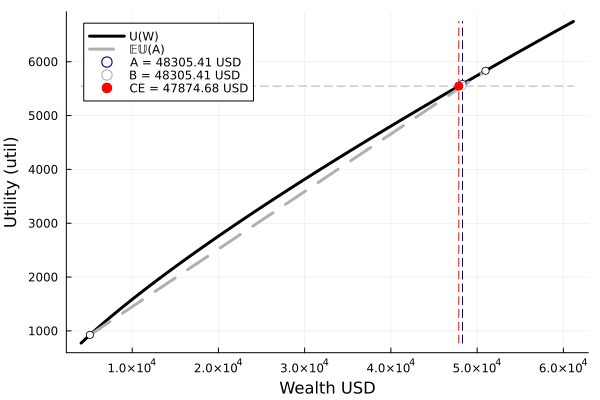

In [37]:
plot(utility_array[:,1],utility_array[:,2], label="U(W)", xlabel="Wealth USD", ylabel = "Utility (util)", lw=3, c=:black)
plot!(tie_line[:,1],tie_line[:,2], label="𝔼𝕌(A)", lw=3, c=:gray69, ls=:dash)
plot!(VLINE₁[:,1], VLINE₁[:,2], label="", c=:navyblue, ls=:dash)
plot!(VLINE₂[:,1], VLINE₂[:,2], label="", c=:red, ls=:dash)
plot!(HLINE[:,1], HLINE[:,2], label="", c=:gray69, ls=:dash, lw=1)
scatter!([W-d],[U1(W-d,τ)], label="", msc=:black, mc=:white)
scatter!([W],[U1(W,τ)], label="", msc=:black, mc=:white)
scatter!([point_A[1]],[point_A[2]], label="A = $(round(point_A[1],digits=2)) USD", msc=:navyblue, mc=:white)
scatter!([point_B[1]],[point_B[2]],label="B = $(round(point_B[1],digits=2)) USD", msc=:gray69, mc=:white)
scatter!([point_C[1]],[point_C[2]],label="CE = $(round(point_C[1],digits=2)) USD", msc=:red, mc=:red, ms=5)

#### Computing the Risk Premium (RP)

In [38]:
RP = Ŵ - CE

430.73259348843567

The `maximum insurance premium` this decision maker is willing to pay is the risk premium `RP` plus the actuarially fair premium $p\cdot{d}$ (the probability of accident $\times$ the damage of an accident):

In [39]:
r̄ = p₁*d + RP

2724.472593488436

# Citations 
https://www.nrel.gov/news/program/2017/failures-pv-panels-degradation.html 